In [2]:
#face detection
import cv2
fd=cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_frontalface_default.xml'
)
vid=cv2.VideoCapture(0)
while True:
    ack,img=vid.read()
    if ack:
        faces=fd.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
            
        cv2.imshow('Preview',img)
        key=cv2.waitKey(1)
        if key==ord('x'):
            break
        
cv2.destroyAllWindows()
vid.release()

In [8]:
#face detection
#varying the scaling
import cv2
fd=cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_frontalface_default.xml'
)
vid=cv2.VideoCapture(0)
while True:
    ack,img=vid.read()
    if ack:
        faces=fd.detectMultiScale(img,1.5,10)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
            
        cv2.imshow('Preview',img)
        key=cv2.waitKey(1)
        if key==ord('x'):
            break
        
cv2.destroyAllWindows()
vid.release()

In [11]:
#face capturing
import cv2
fd=cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_frontalface_default.xml'
)
vid=cv2.VideoCapture(0)
counter=0
while True:
    ack,img=vid.read()
    if ack:
        faces=fd.detectMultiScale(img,1.5,5)
        if len(faces)==1:
            for x,y,w,h in faces:
                cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
            face_img=img[y:y+h,x:x+w,:].copy()
            cv2.imwrite(
                r'images/tripti/face_{0}.png'.format(counter),
                face_img)
            
        cv2.imshow('Preview',img)
        key=cv2.waitKey(1)
        if key==ord('x'):
            break
        
cv2.destroyAllWindows()
vid.release()

In [2]:
import face_recognition as fr

In [7]:
#face registration
import cv2
import pandas as pd
import face_recognition as fr
fname='features.csv'
try:
    df=pd.read_csv(fname)
except:
    df=pd.DataFrame({'name':[],'enc':[]})
fd=cv2.CascadeClassifier(
    cv2.data.haarcascades+'haarcascade_frontalface_default.xml'
)
vid=cv2.VideoCapture(0)
counter=0
names=[]
feats=[]
name=input('Enter the Name:')
while True:
    ack,img=vid.read()
    if ack:
        faces=fd.detectMultiScale(img,1.2,10,minSize=(150,150))
        if len(faces)==1:
            x,y,w,h=faces[0]
            face_img=img[y:y+h,x:x+w,:].copy()
            face_enc=fr.face_encodings(face_img)
            if len(face_enc)==1:
               counter+=1
               names +=[name]
               feats +=[face_enc[0].tolist()]
            if counter == 20:
                f=pd.DataFrame({'name':names,'enc':feats})
                df=pd.concat([df,f],axis=0,ignore_index=True)
                df.to_csv(fname)
                break   
            
        cv2.imshow('Preview',img)
        key=cv2.waitKey(1)
        if key==ord('x'):
            break
        
cv2.destroyAllWindows()
vid.release()

In [1]:
#face recognition
import cv2
import pandas as pd
import numpy as np
import face_recognition as fr
fname='features.csv'
try:
    df=pd.read_csv(fname)
except:
    print('Face Database not found.Halt')
    
    #python uses try except else finally method 
    # where it will try the function ,if it is found then else would perform 
    # otherwise the exception case will be performed.
else:
    fd=cv2.CascadeClassifier(
        cv2.data.haarcascades+'haarcascade_frontalface_default.xml'
    )
    vid=cv2.VideoCapture(0)

    while True:
        ack,img=vid.read()
        if ack:
            faces=fd.detectMultiScale(img,1.2,10,minSize=(150,150))
            if len(faces)==1:
                x,y,w,h=faces[0]
                face_img=img[y:y+h,x:x+w,:].copy()
                face_enc=fr.face_encodings(face_img)
                if len(face_enc)==1:
                    feats_data=df['enc'].apply(lambda x:eval(x)).values.tolist()
                    matches=fr.compare_faces(
                        face_enc,np.array(feats_data))
                    if True in matches:
                        match_ind=matches.index(True)
                        name=df['name'][match_ind]
                    else:
                            name='unknown'
                    cv2.putText(img,name,(150,150),
                        cv2.FONT_HERSHEY_PLAIN,10,(0,0,255),10
                    )

            cv2.imshow('Preview',img)
            key=cv2.waitKey(1)
            if key==ord('x'):
                break
            
    cv2.destroyAllWindows()
    vid.release()

In [4]:
face_enc

[array([-3.65134627e-02,  5.63562885e-02,  1.07641425e-02,  6.55062590e-03,
        -5.94243221e-03, -6.36144876e-02,  3.33432853e-02, -1.06249839e-01,
         1.26925439e-01, -3.45216542e-02,  2.36549467e-01, -1.46196373e-02,
        -2.63937742e-01, -1.86668798e-01,  8.46204311e-02,  8.17003399e-02,
        -1.71959907e-01, -1.82281196e-01, -7.09605068e-02, -2.40326710e-02,
         9.42219272e-02,  4.84827347e-03,  1.64877344e-02,  4.25008200e-02,
        -1.83207631e-01, -3.49028558e-01, -1.18855327e-01, -9.94015858e-02,
         5.33925090e-03, -1.14886932e-01,  8.17698613e-03,  8.22713599e-02,
        -2.35011309e-01, -8.34695324e-02,  2.60796510e-02,  9.71675515e-02,
         1.73530206e-02, -3.09577473e-02,  2.05395669e-01,  7.10634887e-03,
        -2.02339381e-01, -6.53151497e-02,  9.76425856e-02,  2.26609990e-01,
         1.89648628e-01,  1.14649702e-02, -4.26260941e-03, -2.77175754e-03,
         6.19059578e-02, -2.17576012e-01,  9.50761214e-02,  1.16666622e-01,
         2.0

In [12]:
import numpy as np

In [19]:
np.array(df['enc'].apply(lambda x:eval(x)).values[0])

array([-0.11075611,  0.06314826,  0.00880686, -0.04966584, -0.02889588,
       -0.00907319, -0.11340771, -0.14826417,  0.17056419, -0.09279581,
        0.16586934,  0.02149071, -0.16548137, -0.09312374,  0.06213682,
        0.06499606, -0.17617364, -0.13657588, -0.05911953, -0.10867838,
       -0.04380439,  0.07566548, -0.00322902,  0.03401339, -0.16851486,
       -0.36195484, -0.07425541, -0.19264552,  0.02073698, -0.02187363,
       -0.02982454, -0.01501733, -0.17578258, -0.07816144,  0.01913499,
        0.11756269, -0.0934303 , -0.04920614,  0.21758293,  0.02602806,
       -0.10025971, -0.02777931,  0.0262436 ,  0.29140109,  0.18645608,
        0.01278835,  0.03587981, -0.05668918,  0.14104234, -0.20544001,
        0.14174283,  0.1839442 ,  0.09389291,  0.10854995,  0.10724548,
       -0.09718665,  0.04722687,  0.10713866, -0.22893296,  0.08376206,
        0.08174939, -0.03985054, -0.04869285,  0.01750482,  0.26837501,
        0.14327872, -0.09516921, -0.08526558,  0.10921866, -0.12

In [3]:
import pandas as pd
df=pd.read_csv('features.csv')
df

,Unnamed: 0,name,enc
0,0,pandit,"[-0.11075610667467117, 0.06314826011657715, 0...."
1,1,pandit,"[-0.13776029646396637, 0.07290639728307724, -0..."
2,2,pandit,"[-0.13593623042106628, 0.07835904508829117, 0...."
3,3,pandit,"[-0.13763105869293213, 0.10889629274606705, 0...."
4,4,pandit,"[-0.1331067830324173, 0.12216144055128098, 0.0..."
5,5,pandit,"[-0.13836658000946045, 0.10697291046380997, 0...."
6,6,pandit,"[-0.14638181030750275, 0.11282455176115036, 0...."
7,7,pandit,"[-0.12967662513256073, 0.09291806817054749, 0...."
8,8,pandit,"[-0.14214986562728882, 0.10552851855754852, 0...."
9,9,pandit,"[-0.17112107574939728, 0.10463076829910278, 0...."


In [ ]:
import face_recognition as fr
matches=fr.compare_faces(
        face_enc[0],df['enc'].apply(lambda x:eval(x))
 )


In [4]:
import cv2
import matplotlib.pyplot as plt


In [5]:
img1=cv2.imread('robot.jpeg')


In [7]:
import cv2 
sift_d=cv2.SIFT_create() #scale invariant feature transform
orb_d=cv2.ORB_create()   #oriented fast and rotated brief
surf_d=cv2.xfeatures2d.SURF() #speeded up robust features

In [4]:
import cv2
img1=cv2.imread('robot.jpeg')
sift_d=cv2.SIFT_create()
kp1,des1= sift_d.detectAndCompute(img1,None)

In [6]:
kp10=kp1[0]
kp10.size

16.363239288330078

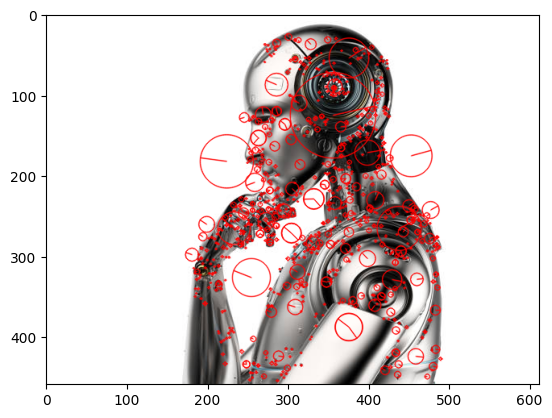

In [10]:
import matplotlib.pyplot as plt
img1_kp=cv2.drawKeypoints(img1,kp1,0,(0,0,255),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1_kp[:,:,::-1])